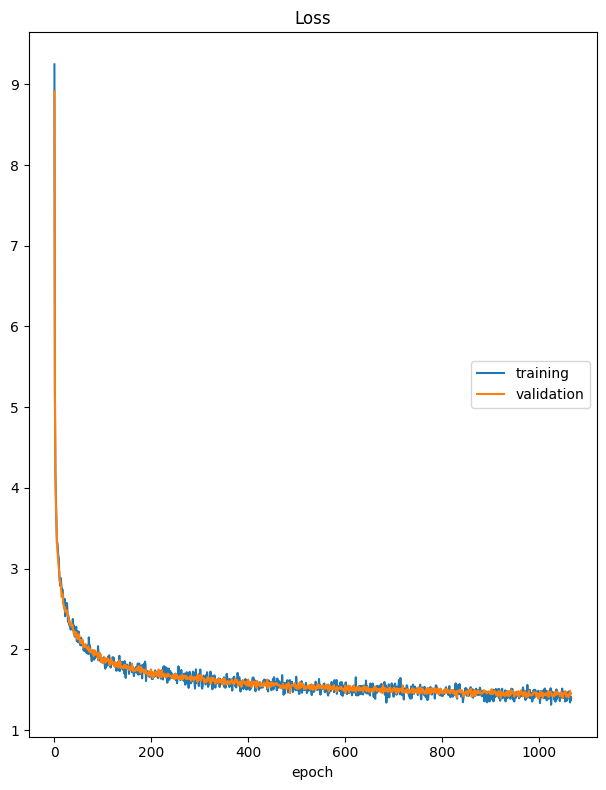

Loss
	training         	 (min:    1.313, max:    9.247, cur:    1.369)
	validation       	 (min:    1.388, max:    8.911, cur:    1.454)
[26651/26666] Loss: 1.3686 | Val Loss: 1.4539
[26651/26666]
[26652/26666]
[26653/26666]
[26654/26666]
[26655/26666]
[26656/26666]
[26657/26666]
[26658/26666]
[26659/26666]
[26660/26666]
[26661/26666]
[26662/26666]
[26663/26666]
[26664/26666]
[26665/26666]
[26666/26666]


In [1]:
from training_loop import *

tiny_stories_params = TransformerParams(
    vocab_size = 10000,
    context_length = 256,
    num_layers = 4,
    d_model = 512,
    num_heads = 16,
    d_ff = 1344,
    theta = 10000
)
adamw_params = AdamWParams(
    lr=3e-4,
    weight_decay=0.01,
)
total_tokens_processed = 327_680_000
batch_size = 48
num_iterations = total_tokens_processed // (batch_size * tiny_stories_params.context_length)
print(f"Total iterations: {num_iterations}")
train_model(
    train_data_path='../data/TinyStoriesV2-GPT4-train.dat',
    val_data_path='../data/TinyStoriesV2-GPT4-valid.dat',
    params=tiny_stories_params,
    adamw_params=adamw_params,
    batch_size=batch_size,
    num_iterations=num_iterations,
    log_interval=25,
    checkpoint_interval=1000,
    compile = True,
    checkpoint_root='../data/TinyStoriesV2-GPT4-checkpoint',
    dtype=torch.float32,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
)
